### Первичный анализ данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:/Users/77479/Desktop/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<div >
    <ul>
        <li>Изменить тип данных year_of_release float64 -> int64, т.к год релиза должен быть целым числом
        <li>Изменить тип данных user_score object -> float64, оценка пользователей должна быть дробным числом
    </ul>
</div>

### Предобработка данных

In [4]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div>
    <br> Переименовал названия столбцов в соответствии с правилами, перевел в нижний регистр
</div>

In [5]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div>

   <br> 269 пропусков в year_of_release (пока не знаю чем заменить год релиза)
   <br> ~8600 пропусков в critic_score возможно заменю на медианную по жанру 
   <br> 6700 пропусков в user_score и rating возможно взаимосвязаны нужно будет изучить эти данные
</div>

In [6]:
# заменю пропуски в name на 'unknown' и genre на 'unknown'
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')

# удаляю пропуски в year_of_release
df = df.dropna(subset=['year_of_release'])

#пропуски в critic_score , user_score и rating трогать не буду , нет идей на что заменить


In [6]:
#заполню пропуски в рейтинге на 'unknown'
df['rating'] = df['rating'].fillna('unknown')

<div>

   
   <br> ~8600 пропусков в critic_score  не трогал и не заменял
   <br> 6700 пропусков в user_score и rating не трогал и не заменял
   <br> пропуски в name и genre заменил на 'unknown'
   <br> удалил пропуски в year_of_release
</div>

In [7]:
# Замена типов данных
df['year_of_release'] = df['year_of_release'].astype('int')

In [8]:
# в user_score есть аббревеатура tbd что означает (будет определено т.е рейтинг пока не известен)
# заменю на значение None

df.loc[df.user_score == 'tbd','user_score'] = None

In [9]:
#теперь нужно изменить тип данных  user_score

df['user_score'] = df['user_score'].astype('float64')


<div>
    <b>Мой комментарий:</b>
    <br> заменил тип данных в year_of_release на int64
    <br> заменил значение tbd в user_score на None
    <br> заменил тип данных  в user_score на float64
</div>

In [10]:
# теперь посчитаю суммарные продажи по всем регионам
df['summary_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

### Исследовательский анализ данных

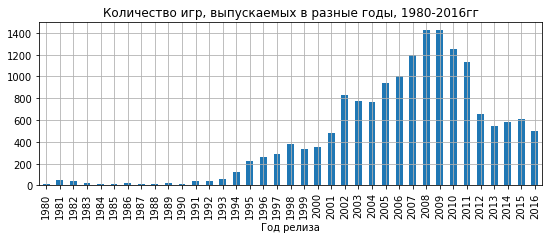

In [12]:
#посмотрим сколько игр выпускалось в разные годы

df.groupby('year_of_release')['genre'].count().plot(kind='bar',figsize=(9,3))
plt.title('Количество игр, выпускаемых в разные годы, 1980-2016гг')
plt.xlabel('Год релиза')
plt.grid(True)
plt.show()


<div>

   <br> видно что начиная с 1992 года кол-во выпускаемых игр с каждым годом возрастало , пик релизов был в 2007-2011 года 
   <br> затем релизы игра пошли на спад
</div>

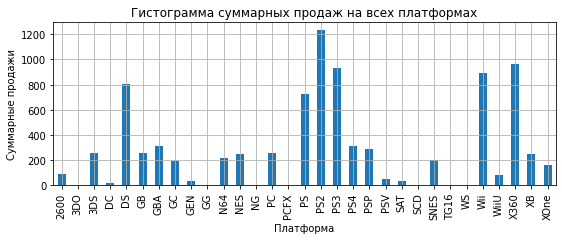

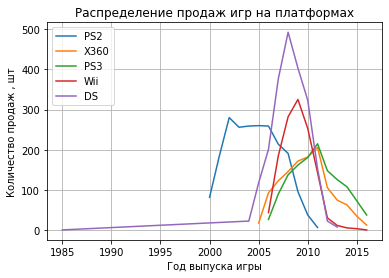

In [13]:
#определим самые лучшие платформы по суммарным продажам

df.groupby('platform')['summary_sales'].sum().plot(kind='bar',figsize = (9,3))
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel("Суммарные продажи")
plt.title('Гистограмма суммарных продаж на всех платформах')
plt.show()


# самые лучшие платформы по продажам топ-5 (PS2, X360, PS3, Wii, DS)
table = df.pivot_table(index=['platform','year_of_release'],values='genre',aggfunc='count').reset_index()

ps2 = table.query('platform == "PS2"')
x360 = table.query('platform == "X360"')
ps3 = table.query('platform == "PS3"')
wii = table.query('platform == "Wii"')
DS = table.query('platform == "DS"')

plt.plot(ps2['year_of_release'],ps2['genre'],label='PS2')
plt.plot(x360['year_of_release'],x360['genre'],label='X360')
plt.plot(ps3['year_of_release'],ps3['genre'],label='PS3')
plt.plot(wii['year_of_release'],wii['genre'],label="Wii")
plt.plot(DS['year_of_release'],DS['genre'],label='DS')


plt.title('Распределение продаж игр на платформах')
plt.xlabel('Год выпуска игры')
plt.ylabel("Количество продаж , шт")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

#построил график продаж игр на ps2 в зависимости от года релиза игры




<div>
    <b> Мой комментарий </b>
    <br> Нашел топ 5 самых продаваемых игровых платформ по продажам игр, построил графики распределения кол-ва выпущенных игр от года релиза , по нему можно сделать выводы что актуальный период когда появляються новые консоли и исчезают старые это период с 2006 по 2012 года
    <br> Построил гистограмму по этим же данным
</div>

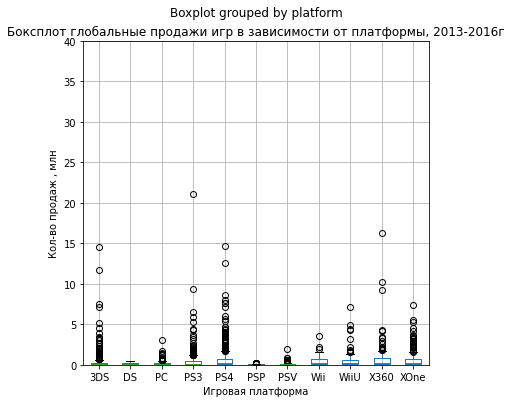

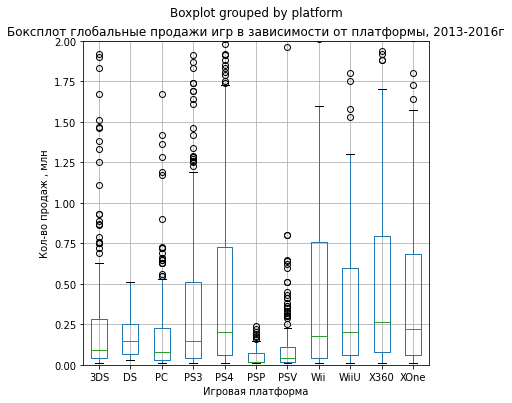

In [14]:
# найдем какие платформы лидируют по продажам за актуальный период
actual_period = df.query('2013 <= year_of_release <= 2016')

actual_period.boxplot(column = 'summary_sales',by='platform',figsize=(6,6))
plt.ylim(0,40)
plt.ylabel('Кол-во продаж , млн')
plt.xlabel('Игровая платформа')
plt.title('Боксплот глобальные продажи игр в зависимости от платформы, 2013-2016г')
plt.show()

#построю тот же боксплот только чтобы было видно межквартильный размах 
actual_period.boxplot(column = 'summary_sales',by='platform',figsize=(6,6))
plt.ylim(0,2)
plt.ylabel('Кол-во продаж , млн')
plt.xlabel('Игровая платформа')
plt.title('Боксплот глобальные продажи игр в зависимости от платформы, 2013-2016г')
plt.show()



<div>
    <b>Мой комментарий:</b>
    <br>По данным боксплота можно сказать что некоторые платформы (Wii, X360, PS3, и т.д) имеют очень большие выбросы , скорее всего это проекты , которые очень хорошо продавались , и обусловили успех этих платформ
    <br>По данным боксплота можно сказать что потенциально прибыльные платформы это платформы нового поколения PS4 , X-box ONE
    <br>Также можно отметить как потенциально прибыльные платформы это X-360, 3DS, PS3
</div>

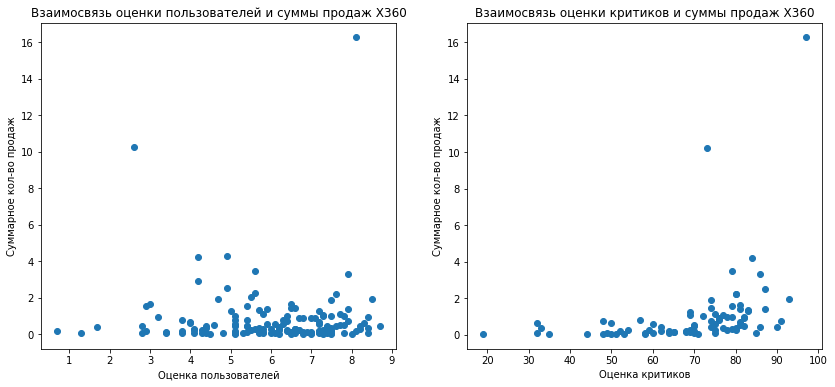

Коэффициант корреляции user_score(summary_sales) : -0.01
Коэффициант корреляции critic_score(summary_sales):   0.35


In [15]:
# нужно проанализировать как влияют отзывы критиков и пользователей на продажи игр внутри одной платфоры
# я выберу платформу PS3
games_x360 = actual_period.query('platform == "X360"')

#display(games_ps3)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

# построим диаграмму рассеивания для summary_sales и user_score

ax1.scatter(games_x360['user_score'],games_x360['summary_sales'])
ax1.set_title('Взаимосвязь оценки пользователей и суммы продаж X360')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Суммарное кол-во продаж')

#построим диаграмму рассеивания для summary_sales и critic_score
ax2.scatter(games_x360['critic_score'],games_x360['summary_sales'])
ax2.set_title('Взаимосвязь оценки критиков и суммы продаж X360')
ax2.set_xlabel('Оценка критиков')
ax2.set_ylabel('Суммарное кол-во продаж')
plt.show()

print('Коэффициант корреляции user_score(summary_sales) :',round(games_x360['user_score'].corr(games_x360['summary_sales']),2))
print('Коэффициант корреляции critic_score(summary_sales):  ',round(games_x360['critic_score'].corr(games_x360['summary_sales']),2))

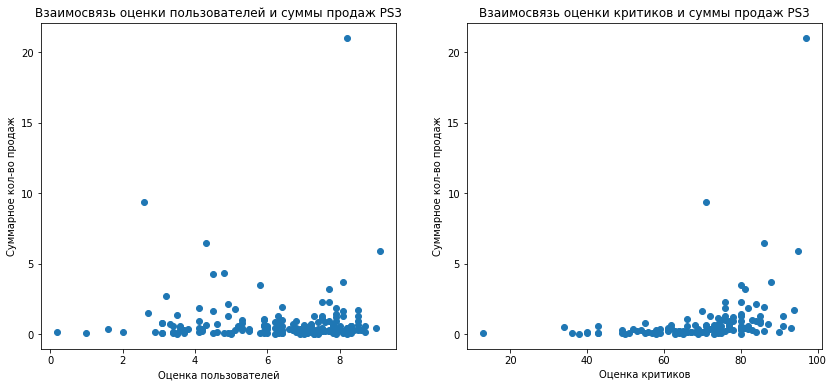

Коэффициант корреляции user_score(summary_sales) : 0.0
Коэффициант корреляции critic_score(summary_sales):   0.33


In [15]:
# нужно проанализировать как влияют отзывы критиков и пользователей на продажи игр внутри одной платфоры
# я выберу платформу PS3
games_ps3 = actual_period.query('platform == "PS3"')



#display(games_ps3)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))


# построим диаграмму рассеивания для summary_sales и user_score

ax1.scatter(games_ps3['user_score'],games_ps3['summary_sales'])
ax1.set_title('Взаимосвязь оценки пользователей и суммы продаж PS3')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Суммарное кол-во продаж')




#построим диаграмму рассеивания для summary_sales и critic_score
ax2.scatter(games_ps3['critic_score'],games_ps3['summary_sales'])
ax2.set_title('Взаимосвязь оценки критиков и суммы продаж PS3')
ax2.set_xlabel('Оценка критиков')
ax2.set_ylabel('Суммарное кол-во продаж')
plt.show()

print('Коэффициант корреляции user_score(summary_sales) :',round(games_ps3['user_score'].corr(games_ps3['summary_sales']),2))
print('Коэффициант корреляции critic_score(summary_sales):  ',round(games_ps3['critic_score'].corr(games_ps3['summary_sales']),2))

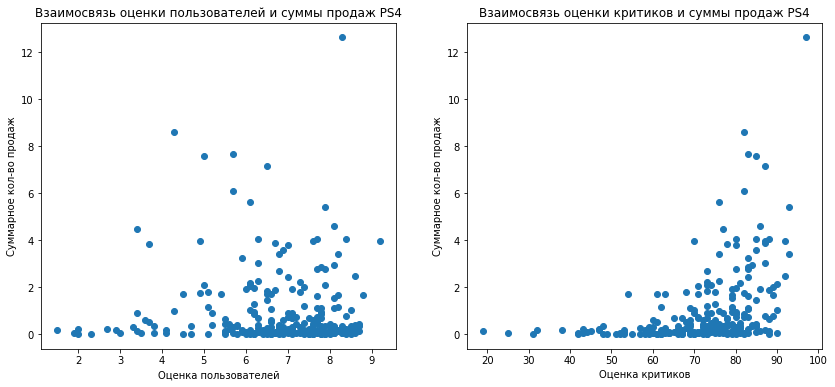

Коэффициант корреляции user_score(summary_sales) : -0.03
Коэффициант корреляции critic_score(summary_sales):   0.41


In [16]:
# нужно проанализировать как влияют отзывы критиков и пользователей на продажи игр внутри одной платфоры
# я выберу платформу PS3
games_ps4 = actual_period.query('platform == "PS4"')

#display(games_ps3)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

# построим диаграмму рассеивания для summary_sales и user_score

ax1.scatter(games_ps4['user_score'],games_ps4['summary_sales'])
ax1.set_title('Взаимосвязь оценки пользователей и суммы продаж PS4')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Суммарное кол-во продаж')

#построим диаграмму рассеивания для summary_sales и critic_score
ax2.scatter(games_ps4['critic_score'],games_ps4['summary_sales'])
ax2.set_title('Взаимосвязь оценки критиков и суммы продаж PS4')
ax2.set_xlabel('Оценка критиков')
ax2.set_ylabel('Суммарное кол-во продаж')
plt.show()

print('Коэффициант корреляции user_score(summary_sales) :',round(games_ps4['user_score'].corr(games_ps4['summary_sales']),2))
print('Коэффициант корреляции critic_score(summary_sales):  ',round(games_ps4['critic_score'].corr(games_ps4['summary_sales']),2))

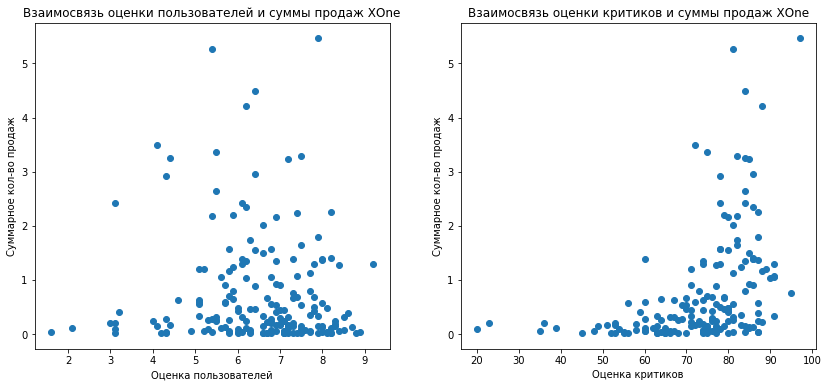

Коэффициант корреляции user_score(summary_sales) : -0.07
Коэффициант корреляции critic_score(summary_sales):   0.42


In [17]:
# нужно проанализировать как влияют отзывы критиков и пользователей на продажи игр внутри одной платфоры
# я выберу платформу PS3
games_xone = actual_period.query('platform == "XOne"')



#display(games_ps3)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))


# построим диаграмму рассеивания для summary_sales и user_score

ax1.scatter(games_xone['user_score'],games_xone['summary_sales'])
ax1.set_title('Взаимосвязь оценки пользователей и суммы продаж XOne')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Суммарное кол-во продаж')




#построим диаграмму рассеивания для summary_sales и critic_score
ax2.scatter(games_xone['critic_score'],games_xone['summary_sales'])
ax2.set_title('Взаимосвязь оценки критиков и суммы продаж XOne')
ax2.set_xlabel('Оценка критиков')
ax2.set_ylabel('Суммарное кол-во продаж')
plt.show()

print('Коэффициант корреляции user_score(summary_sales) :',round(games_xone['user_score'].corr(games_xone['summary_sales']),2))
print('Коэффициант корреляции critic_score(summary_sales):  ',round(games_xone['critic_score'].corr(games_xone['summary_sales']),2))

<div>
    <b>Мой комментарий:</b>
    <br>Зависимости между оценкой пользователей и продажами не обнаружены, зависимость между оценкой критиков и продажами - слабо выраженная
    <b>Мой комментарий после 2-го ревью:</b>
    <br>Построил графики рассеивания для еще двух платформ PS4 и X360 по их коэфициентам можно также сказать, что
    <br>Зависимости между оценкой пользователей и продажами не обнаружены, зависимость между оценкой критиков и продажами - слабо выраженная
</div>

In [17]:
x = actual_period.groupby('genre')['genre'].count()

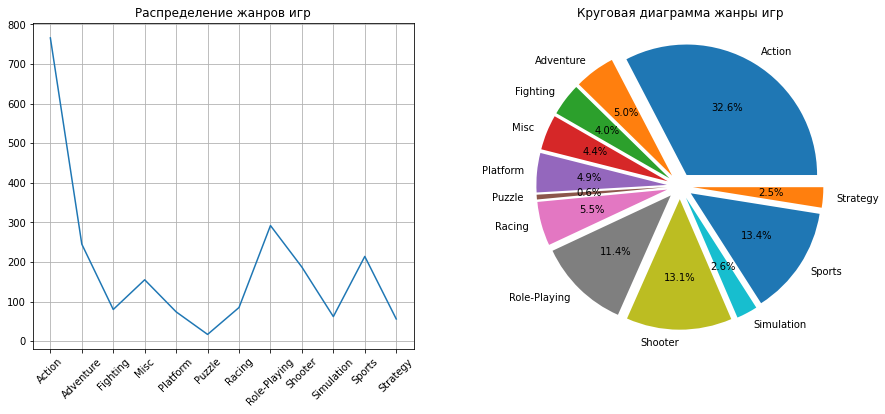

In [18]:
# посмотрим на общее распределение игр по жанрам
fig1,(a1,a2) = plt.subplots(1,2,figsize=(15,6))

a1.plot(x)
a1.grid(True)
a1.set_title("Распределение жанров игр")
a1.tick_params(axis='x',rotation=45)


data = actual_period.groupby('genre')['user_score'].count()
a2.pie(data ,labels=data.index, autopct='%1.1f%%', explode = [0.1 for x in range(12)])

a2.set_title('Круговая диаграмма жанры игр')
plt.show()

<div>
    <b>Мой комментарий</b>
    <br> По данным частотной гистограммы по жанру можно сказать , что игр жанров Sports и Action самое большое кол-во за актуальный период , а жанров racing и fighting  самое минимальное
</div>

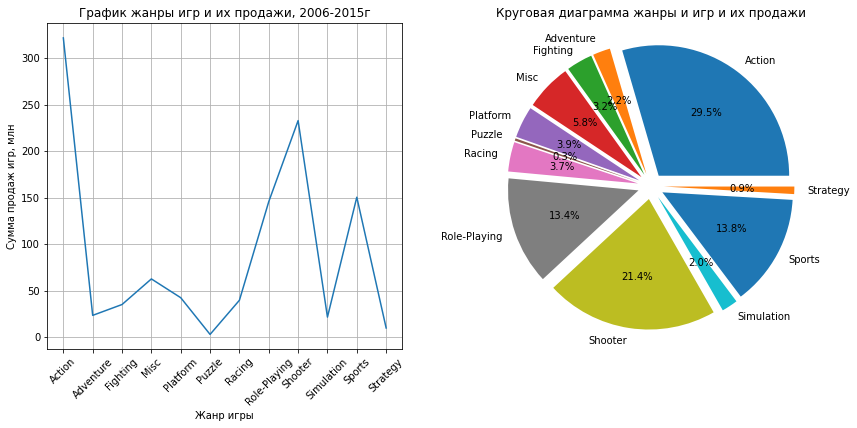

In [19]:
genre_sales = actual_period.groupby('genre')['summary_sales'].sum().reset_index()
#display(genre_sales)

fig3,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.plot(genre_sales['genre'],genre_sales['summary_sales'])
ax1.set_title('График жанры игр и их продажи, 2006-2015г')
ax1.set_ylabel('Сумма продаж игр, млн')
ax1.set_xlabel('Жанр игры')
ax1.grid(True)
ax1.tick_params(axis='x',rotation=45)


ax2.pie(genre_sales['summary_sales'],labels = genre_sales['genre'],autopct='%1.1f%%', explode = [0.1 for x in range(12)])
ax2.set_title('Круговая диаграмма жанры и игр и их продажи')
plt.show()

<div>
    <b>Мой комментарий</b>
    <br> По данным графика продаж игр от их жанра можно сказать , что самый прибильный жанр в актуальный период это жанр - Action, Sports , а самый низкие продажи показал жанр Puzzle , Adventure, Strategy,Fighting
</div>

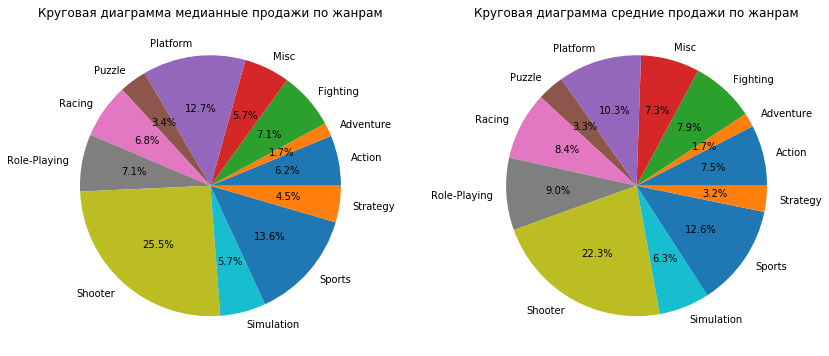

In [21]:
sales  = actual_period.groupby('genre')['summary_sales'].agg(['median','mean'])

figure, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))


ax1.pie(sales['median'],labels=sales.index,autopct='%1.1f%%')
ax1.set_title('Круговая диаграмма медианные продажи по жанрам')

ax2.pie(sales['mean'],labels=sales.index,autopct='%1.1f%%')
ax2.set_title('Круговая диаграмма средние продажи по жанрам')

plt.show()

<div>
    <b>Мой комментарий</b>
    <br> По данным группированной таблице по жанру можно сказать , что самый стабильно продаваемый прибыльный жанр это Shooter, 
    а жанр с самыми низкими продажами Adventure
</div>

### Портрет пользователя каждого региона

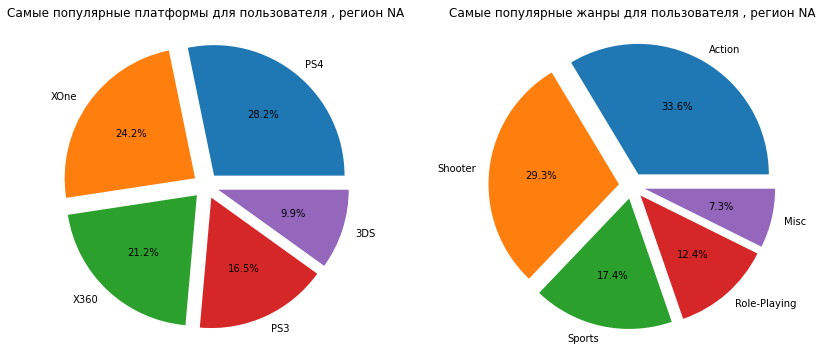

In [20]:
# нужно найти самые популярные платформы в каждом регионе (топ-5)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# сделаем это сначала для NA (North America)
platform_data_na = actual_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

ax1.pie(platform_data_na.head(),labels = platform_data_na.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax1.set_title('Самые популярные платформы для пользователя , регион NA')

genre_data_na = actual_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
ax2.pie(genre_data_na.head(),labels=genre_data_na.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax2.set_title('Самые популярные жанры для пользователя , регион NA')
plt.show()



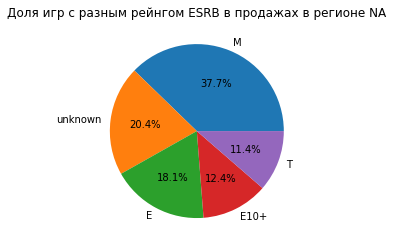

In [23]:
# посмотрим по круговой диаграмме влияет ли рейтинг на продажи в отдельном регионе
rating_na_data = actual_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
plt.pie(rating_na_data, labels = rating_na_data.index, autopct = "%1.1f%%")
plt.title('Доля игр с разным рейнгом ESRB в продажах в регионе NA')
plt.show()

<div>
    <b> Мой комментарий: </b>
    <br> Вывел портрет пользователя региона NA (north america) , самые популярные платформы - PS4, XOne, X360, PS3, 3DS 
    , а самые популярные жанры - Action, Shooter, Sports, Role-Playing, Misc
    <br> по медианным данным продажи внутри региона , зависимостей не было замечено
</div>

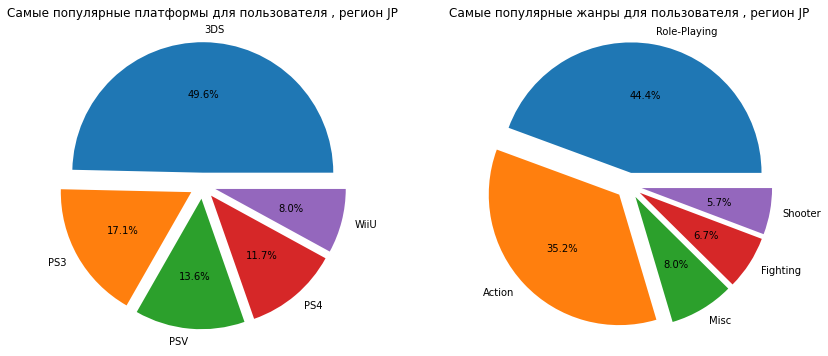

In [21]:
# нужно найти самые популярные платформы в каждом регионе (топ-5)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# сделаем это сначала для JP (Japan)
platform_data_jp = actual_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

ax1.pie(platform_data_jp.head(),labels = platform_data_jp.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax1.set_title('Самые популярные платформы для пользователя , регион JP')

genre_data_jp = actual_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
ax2.pie(genre_data_jp.head(),labels=genre_data_jp.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax2.set_title('Самые популярные жанры для пользователя , регион JP')
plt.show()
 # написать найти средние(медианные) продажи в данном регионе в зависимости от рейтинга 


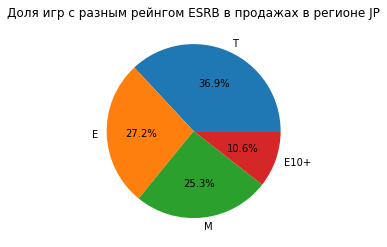

In [22]:
# посмотрим по круговой диаграмме влияет ли рейтинг на продажи в отдельном регионе
rating_jp_data = actual_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
plt.pie(rating_jp_data, labels = rating_jp_data.index, autopct = "%1.1f%%")
plt.title('Доля игр с разным рейнгом ESRB в продажах в регионе JP')
plt.show()

<div>
    <b> Мой комментарий: </b>
    <br> Вывел портрет пользователя региона JP (Japan) , самые популярные платформы - PS3, 3DS , PSV, PS4, WiiU
    , а самые популярные жанры - Action, Role-Playing, 
    <br> по медианным данным продажи внутри региона , зависимостей не было замечено
    <br> В регионе JP почти половина рынка продаж принадлжит плафтформе 3DS
</div>

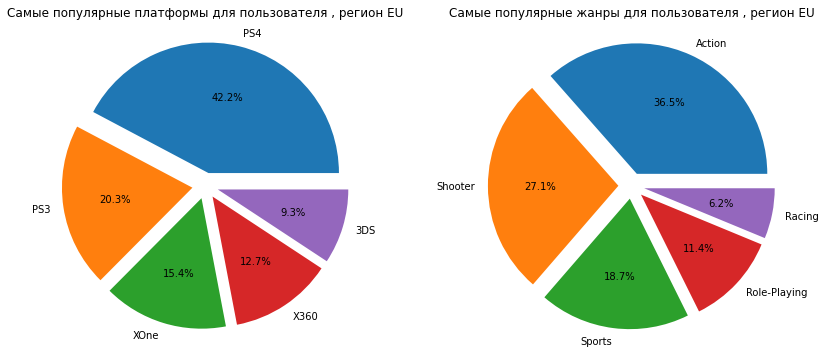

In [23]:
# нужно найти самые популярные платформы в каждом регионе (топ-5)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# сделаем это сначала для EU (Europe)
platform_data_eu = actual_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

ax1.pie(platform_data_eu.head(),labels = platform_data_eu.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax1.set_title('Самые популярные платформы для пользователя , регион EU')

genre_data_eu = actual_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
ax2.pie(genre_data_eu.head(),labels=genre_data_eu.head().index, autopct='%1.1f%%', explode = [0.1 for x in range(5)])
ax2.set_title('Самые популярные жанры для пользователя , регион EU')
plt.show()
 # написать найти средние(медианные) продажи в данном регионе в зависимости от рейтинга 
    


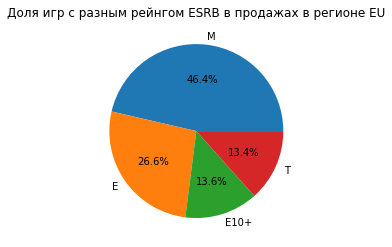

In [24]:
# посмотрим по круговой диаграмме влияет ли рейтинг на продажи в отдельном регионе
rating_eu_data = actual_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
plt.pie(rating_eu_data, labels = rating_eu_data.index, autopct = "%1.1f%%")
plt.title('Доля игр с разным рейнгом ESRB в продажах в регионе EU')
plt.show()

<div>
    <b> Мой комментарий: </b>
    <br> Вывел портрет пользователя региона EU (Europe) , самые популярные платформы - PS4, PS3 , XOne, 3DS, X360
    , а самые популярные жанры - Action, Shooter, Sports, Racing, Role-Playing
    <br> по медианным данным продажи внутри региона , зависимостей не было замечено
</div>

<div>
    <br> посчитал кол-во игр без рейтинга проданных в разных регионах , на основание этих данных можно сделать вывод , что
    рейтинг ESRB влияет на продажи в регионе EU , так как там самые низкие продажи игр без рейтинга 
    <br>Также можно сказать что процент проданных игр  без рейтинга в каждом из регионов ~ от 7,7 до  8,8%
    <br>Влияет рейтинг на продажи в каждой стране только в регионе JP самые большие продажи игр без рейтинга
</div>

### Проверка гипотез

Средние пользовательские рейтинги платформ X-Box One и PC равны
<br>Отсюда формируем нулевую гипотезу : Ho - средние пользовательские рейтинги x-box one и pc равны <br>Aльтернативная гипотеза двустороняя : H1 - средние пользовательские рейтинги x-box one и pc не равны (x-box != pc)


In [25]:

# возьмем две выборки по рейтингам
#удаляю у них пропуски т.к ttest не работает с выборками с пропусками
user_score_xbox = actual_period.dropna()
user_score_xbox = user_score_xbox.query('platform == "XOne"')['user_score']

user_score_pc = actual_period.dropna()
user_score_pc = user_score_pc.query('platform == "PC"')['user_score']


# буду применять ttest_ind c equal_var = False
results = st.ttest_ind(user_score_xbox, user_score_pc,equal_var=False)

#установлю уровень значимости равный 5%
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print("Нет достаточно оснований чтобы отклонить нулевую гипотезу")


0.14104275299383137
Нет достаточно оснований чтобы отклонить нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<br>Ho - средние пользовательские рейтинги жанров action и sports равны 
<br>H1 - средние пользовательски рейтинги жанров action и sports не равны

In [26]:
#возьмем две выборки с нужными жанрами и рейтингами пользователей , буду использовать ttest_ind()

action_score = actual_period.dropna()
action_score = action_score.query('genre == "Action"')['user_score']

sports_score = actual_period.dropna()
sports_score = sports_score.query('genre == "Sports"')['user_score']

alpha = .05

results = st.ttest_ind(action_score, sports_score, equal_var=False)

print(f'p-уровень значимости: {results.pvalue}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонять нулевую гипотезу')


p-уровень значимости: 7.136312729062867e-13
Отклоняем нулевую гипотезу


<div>
    <b> Мой комментарий: </b>
    <br> Проверил две гипотезы  , по их результатам можно сказать что пользовательские рейтинги платформ xbox и pc не различаются, 
    <br> а пользовательские рейтинги жанров sports и action различаются
</div>

### Вывод

<div>
    <br> Был проведен полный анализ данных игр за актульный период 2005-2012 года  , по результатам анализа можно сказать , что самые успешные игровые платформы это X360, ps2,ps3, wii , ds/
    <br> По актуальным данным был создан портрет пользователя в зависимости от региона , так в регионе JP больше играю в платформы созданные там же , такие как ps2, ps3 ,ds ,psp , а самый популярные жанры оказались RolePlaying, Action
    <br> Также были проверены гипотезы о равенстве средних пользовательский рейтингов в зависимости от платформы и от жанра, 
    первая гипотеза не подтвердилась т.е средние пользовательские рейтинги платформ xbox и pc различаются, а вторая гипотеза подтвердилась , т.е средние пользовательские рейтинги жанров Action и Sports не различаются 
    <br> Не установлена корреляция (зависимость) во всех регионах от рейтинга ESRB
    <br>Также установлена связь между оценкой критиков и кол-вом продаж игр (но почти нет связи с оценками игроков)
</div>